In [1]:
# Get pandas for dealing with xlsx
import pandas as pd
# Old numpy
import numpy as np
# Stats
import statistics as st
import statsmodels.api as sm
# Plotting
import matplotlib.pyplot as plt
import math

In [2]:
# set path
path = "/Users/chaseabram/UChiGit/Skwad/Empirical Analysis III/Problem Sets/Heckman Pset 4/PS4_Data.xlsx"
# read file
xls = pd.ExcelFile(path)

(2, 10000)


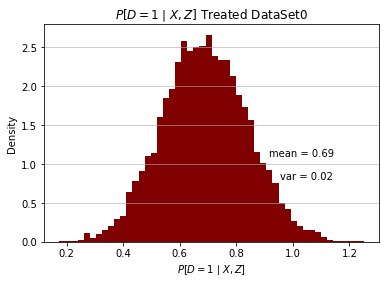

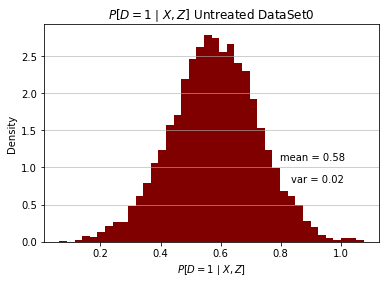

(2, 1000)


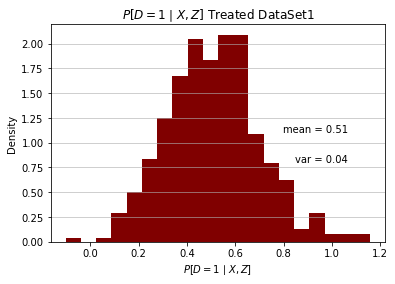

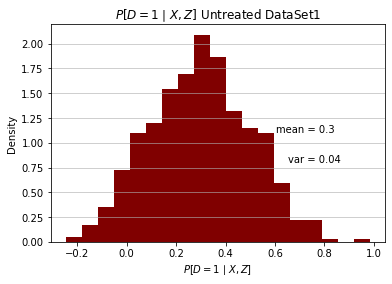

(2, 100000)


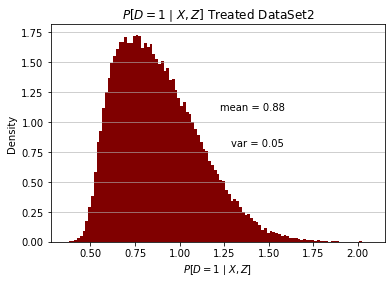

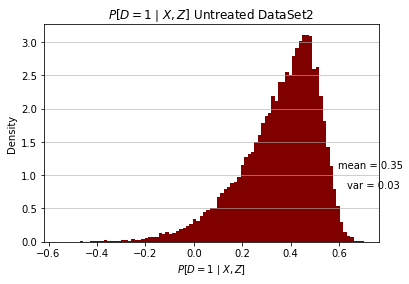

(2, 10000)


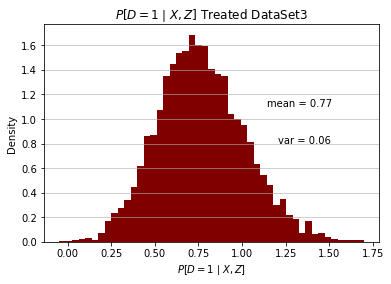

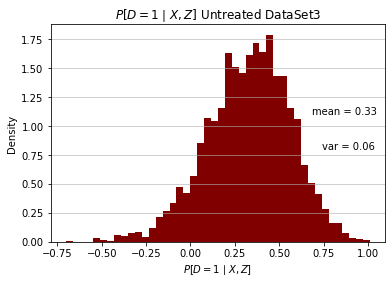

In [87]:
# Get number of sheets (4)
num_sheets = len(xls.sheet_names)
# initialize data frame
dfs = [0]*num_sheets

# results data frame
# column_names = ['sample', 
#                'betax0', 'betax1', 'betax2','betaz0', 'betaz1', 'betaz1', 'Dhat']
# results = pd.DataFrame(columns = column_names)

# read each sheet into data frame and perform analysis
for i in range(0,num_sheets):
    # Add to data frame
    sheet_name = 'DataSet' + str(i)
    dfs[i] = pd.read_excel(xls, sheet_name)
    
    # read in data
    Y = dfs[i]['Y']
    
    D = dfs[i]['D']
    
    X = np.zeros((3, len(dfs[i])))
    X[0] = [1]*len(dfs[i])
    X[1] = dfs[i]['X1']
    X[2] = dfs[i]['X2']
    print(np.shape(X[1:4]))
    
    Z = np.zeros((3, len(dfs[i])))
    Z[0] = [1]*len(dfs[i])
    Z[1] = dfs[i]['Z1']
    Z[2] = dfs[i]['Z2']
    
    # A
#     print(np.shape(np.vstack((X[1:2],Z[1:2]))))
    X_A = np.vstack((X,Z[1:3])).T
    model_A = sm.OLS(D,X_A)
    result_A = model_A.fit()
    betas = result_A.params
#     print(betas)
    Dhat_A = result_A.predict(X_A)
#     print(min(Dhat_A))
    
    # B
    treat_index = np.where(D > 0)
    untreat_index = np.where(D < 1)
#     print(np.shape(treat_index))
    Dhat_t = Dhat_A[treat_index]
    Dhat_u = Dhat_A[untreat_index]
#     print(Dhat_t)
    
    for Ds in [Dhat_t, Dhat_u]:
        Dstr = 'Treated'
        if Ds is Dhat_u:
            Dstr = 'Untreated'
        # Histogram to see distribution of "propensity score"
        plt.hist(Ds, bins='auto', density = True, color="maroon")
        plt.grid(axis='y', alpha=0.75)
        plt.xlabel(r'$P[D = 1 \mid X,Z]$')
        plt.ylabel('Density')
        plt.title(r'$P[D = 1 \mid X,Z]$ '+ Dstr + " DataSet" + str(i))
        # include mean and variance of dist
        Ds_mean = np.mean(Ds)
        Ds_var = np.var(Ds)
        plt.text(Ds_mean +1.5*np.sqrt(Ds_var), 1.1, r'mean = ' + str(round(Ds_mean,2)))
        plt.text(Ds_mean +1.75*np.sqrt(Ds_var), 0.8, r'var = ' + str(round(Ds_var,2)))
        plt.savefig("3B dist (Chase) " + Dstr + " DataSet" + str(i))
        plt.show()
    
    
    
    
    
    
    # means
#     mu_1 = np.mean(X[1])
#     mu_2 = np.mean(X[2])
    
#     # var-cov
#     Sigma = np.cov(X)
#     sigma_1 = math.sqrt(Sigma[1,1])
#     sigma_2 = math.sqrt(Sigma[2,2])
                       
#     # rho
#     rho = Sigma[2,1]/(Sigma[1,1]*Sigma[2,2])
    
#     # run ols with X1 and X2
#     model = sm.OLS(Y,X.T)
#     result = model.fit()
#     betas = result.params
    
#     # est var of residuals
#     sigma_e = np.cov(result.resid)
    
#     # t stat
#     tstat = result.tvalues[2]
    
#     # t default is reject beta_2 = 0
#     t_test = 1
    
#     # t test for beta 2
#     if abs(tstat) < 1.964:
#         # t test cannot reject null of beta_2 = 0
#         t_test = 0
        
#         # OVB regression replaces beta_0 and beta_1
#         model = sm.OLS(Y,X[0:2].T)
#         result = model.fit()
#         betas[0:2] = result.params 
    
#     # create new data frame entry with variables
#     new_df = pd.DataFrame(np.array([i, mu_1, mu_2, sigma_1, sigma_2, sigma_e,
#                           rho, betas[0], betas[1], betas[2], tstat, t_test])).T
#     new_df.columns = column_names
    
#     # add to results data frame
#     results = pd.concat([results, new_df])

# # save estimates
# results.to_csv ("/Users/chaseabram/UChiGit/Skwad/Empirical Analysis III/Problem Sets/Heckman Pset 4/Q3_output.csv", index = False, header=True)
# results

In [63]:
a = [[1,2,3],[4,5,6]]
print(a[0][1:])
np.shape(a)

[2, 3]


(2, 3)